In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score as r2
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
param_1='Square'
param_2='Ecology_2'
param_3='DistrictId'
col_clasters = 5
feats=['max_param_2', 'is_large_param_2','cluster_0','mean_price_by_param_2_param_3', 'mean_price_by_param_3',
       'cluster_1', 'cluster_2','cluster_3','cluster_4']
#Переменные параметров, для удобной замены

In [3]:
def add_info_param_2(df,group_param_2):
    df=pd.merge(df,group_param_2,on=param_2,how='left')
    df['is_large_param_2']=df['is_large_param_2'].fillna(0)
    df['max_param_2']=df['max_param_2'].fillna(1)
    return df
# Функция для смены параметра is_large_param_2 для выборки
# df - датафрейм для изменения
# group_param_2 - откуда брать изменения

In [4]:
def add_mean_price(df,price_mean_by_param_2_param_3,price_mean_by_param_3,price):
    df=pd.merge(df,price_mean_by_param_2_param_3,on=[param_2,param_3],how='left')
    df=pd.merge(df,price_mean_by_param_3,on=param_3,how='left')
    df['mean_price_by_param_2_param_3']= df['mean_price_by_param_2_param_3'].fillna(df['mean_price_by_param_3'])
    df['mean_price_by_param_2_param_3']=df['mean_price_by_param_2_param_3'].fillna(price)
    df['mean_price_by_param_3']=df['mean_price_by_param_3'].fillna(price)
    return df
# Меняем(присоединяем) среднюю цену на квартиру в каждом районе, 
# средняя цена комнаты, среднюю цену
# df                        - датафрейм для изменения
# price_mean_by_param_2_param_3 - средняя цена на квартиру в каждом районе
# price_mean_by_param_3       - средняя цена комнаты
# price                     - средняя цена

In [5]:
def dummies(df,cluster='cluster'):
    df[cluster]=df[cluster].astype(object)
    df=pd.get_dummies(df)
    return df
# Присваивает кластер в DataFrame
# df                        - датафрейм для изменения
# cluster - const (столбец)

In [6]:
file_data_train=pd.read_csv('train.csv')
file_data_test=pd.read_csv('test.csv')
# Загрузки информации о наблюдениях из файлов

In [7]:
file_data_train.describe()
# Просмотр тренировочных наблюдений

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
file_data_train.fillna(file_data_train.mean())
file_data_train.loc[file_data_train['HouseYear']==20052011,'HouseYear']=2008
file_data_train.loc[file_data_train['HouseYear']==4968,'HouseYear']=1968
file_data_train.loc[round(file_data_train['Square'],6)==round(641.065193,6),'Square']=64.1065193
file_data_train.loc[round(file_data_train['Square'],6)==round(604.705972,6),'Square']=60.4705972
file_data_train.loc[round(file_data_train['Square'],6)==round(409.425181,6),'Square']=40.9425181
file_data_train.loc[file_data_train['Ecology_2']=='A','Ecology_2']=0
file_data_train.loc[file_data_train['Ecology_2']=='B','Ecology_2']=1
file_data_train.loc[file_data_train['KitchenSquare']==2014.0,'KitchenSquare']=14
file_data_train.loc[file_data_train['KitchenSquare']==1970.0,'KitchenSquare']=19
#заполняем пропуски в данных и обрабатываем некоррктные данные в тренировочной выборке
file_data_test.fillna(file_data_test.mean())
file_data_test.loc[file_data_test['Ecology_2']=='A','Ecology_2']=0
file_data_test.loc[file_data_test['Ecology_2']=='B','Ecology_2']=1
#заполняем пропуски в данных и обрабатываем некоррктные данные в тестовой выборке

In [9]:
train,valid=train_test_split(file_data_train,test_size=0.3, random_state=100)
# Разбивка тренировочных наблюдений на тренировочный и валидационный датафреймыё

In [10]:
group_param_2=train[param_2].value_counts().reset_index().rename(columns={param_2:'max_param_2','index':param_2})
group_param_2
#Группируем данные по параметру param_2 и считаем их кол-во

,Ecology_2,max_param_2
0,1,6926
1,0,74


In [11]:
group_param_2['is_large_param_2']=(group_param_2['max_param_2']>100).astype(int)
group_param_2
# Если количество > 100 ставим флаг

,Ecology_2,max_param_2,is_large_param_2
0,1,6926,1
1,0,74,0


In [12]:
group_param_2.head()
#  Посмотрим что получилось

,Ecology_2,max_param_2,is_large_param_2
0,1,6926,1
1,0,74,0


In [13]:
price=train['Price'].mean()
price
# Среднее значение цены

213385.70027277592

In [14]:
price_mean_by_param_3= train.groupby([param_3],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_param_3'})
price_mean_by_param_3.head()
# Считаем среднюю цену комнаты

,DistrictId,mean_price_by_param_3
0,0,188447.447158
1,1,186429.369081
2,2,253489.961936
3,3,179115.692854
4,4,317318.764706


In [15]:
price_mean_by_param_2_param_3=train.groupby([param_2,param_3],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_param_2_param_3'})
price_mean_by_param_2_param_3.head()
# Считаем среднюю цену на квартиру в каждом районе

,Ecology_2,DistrictId,mean_price_by_param_2_param_3
0,0,11,255419.355706
1,0,57,160524.045134
2,0,71,156072.741012
3,0,101,188098.860161
4,0,192,178782.924133


In [16]:
train=add_info_param_2(train,group_param_2)
# прим. add_info_param_2 к тренеровочной выборке

In [17]:
train=add_mean_price(train,price_mean_by_param_2_param_3,price_mean_by_param_3,price)
# прим. add_mean_price к тренеровочной выборке

In [18]:
train.columns
# Посмотрели столбцв

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'max_param_2',
       'is_large_param_2', 'mean_price_by_param_2_param_3',
       'mean_price_by_param_3'],
      dtype='object')

In [19]:
scaler=MinMaxScaler()
#Метод для нормализации данных
# Распределяет веса значений наименьшее 0 наидольшее 1

In [20]:
train_scaled=scaler.fit_transform(train.loc[:,[param_1,param_2]])
#Нормализуем нашу выборку (обучает модель и получает стандартизованные даные)

In [21]:
train_scaled
# Выводим нормализованный массив значений

array([[0.29132366, 1.        ],
       [0.18106629, 1.        ],
       [0.18638477, 1.        ],
       ...,
       [0.22591128, 1.        ],
       [0.16299374, 1.        ],
       [0.15643228, 1.        ]])

In [22]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=10)
#     создаем временную модель k-средних (число кластеров, )
    temp_model.fit(train_scaled)
#     обучаем модель
    temp_inertia=temp_model.inertia_
#     сумма квадратов расстояний до кластера(подбор оптимального кол-ва кластеров)
    print(temp_inertia)
    inertia_arr.append(temp_inertia)
#Кластеризация данных
# Разбивает множество элементов векторного пространства на заранее известное число кластеров k.
# Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение 
# на точках каждого кластера.

33.018458840327426
12.291791952080393
6.849884955758402
4.319531455347747
3.355682652891874
2.4241478512203694
1.922659042329087
1.6094598536626208


Text(0.5, 1.0, 'INERTIA')

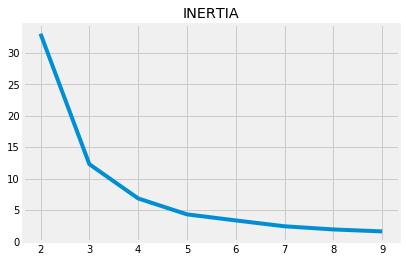

In [23]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA')
# Гравик квадратов расстояний до кластеров

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
model=AgglomerativeClustering(n_clusters=col_clasters)
# Модель агламиративной кластеризации

In [26]:
train['cluster']=model.fit_predict(train_scaled)
# Обучаем модель и создаем метки кластеров,
# cluster - название нового параметра кластера

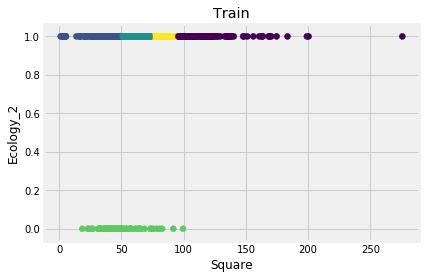

In [27]:
plt.title('Train')
plt.xlabel(param_1)
plt.ylabel(param_2)
plt.scatter(train[param_1],train[param_2],c=train['cluster'])
# Ввыводим график

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=col_clasters)
# Модель дивизивной кластеризации

In [30]:
knn.fit(train_scaled,train['cluster'])
# Обучаем модель

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
valid_scaled=scaler.transform(valid.loc[:,[param_1,param_2]])
# Получаем стандартизованные значения

In [32]:
valid['cluster']=knn.predict(valid_scaled)
# получаем предсказанные значения

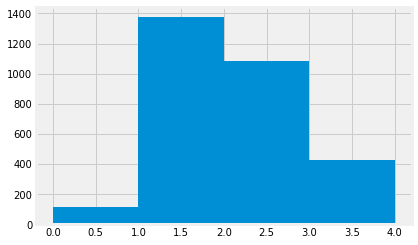

In [33]:
valid['cluster'].hist(bins=4);
# выводим график

In [34]:
train=dummies(train)
# прим. dummies к тренеровочной выборке

In [35]:
from sklearn.ensemble import RandomForestRegressor as RF
model=RF(n_estimators=40,max_depth=10,random_state=100)
# Модель RandomForestRegressor

In [36]:
model.fit(train.loc[:,feats],train['Price'])
# Обучаем модель

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [37]:
valid=add_info_param_2(valid, group_param_2)
# прим. add_info_param_2 к valid выборке

In [38]:
valid=add_mean_price(valid,price_mean_by_param_2_param_3,price_mean_by_param_3,price)
# прим. add_mean_price к valid выборке

In [39]:
valid=dummies(valid)
# прим. dummies к valid выборке

In [40]:
y_pred=model.predict(valid.loc[:,feats])
# получаем предсказанные значения valid выборки

In [41]:
y_pred

array([162745.99926074, 213333.57862534, 137472.46268219, ...,
       390505.11764145, 246811.72359721, 206133.33101708])

In [42]:
r2(valid['Price'],y_pred)
# Вычисляем r2 для валидной выборки

0.6539451098810247

In [43]:
#y_pred_test=model.predict(train.loc[:,feats])

In [44]:
#r2(train['Price'],y_pred_test)
# Вычисляем r2 для тренировочной выборки

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(valid["Price"],y_pred)

3108654631.911272

In [46]:
#mean_squared_error(train["Price"],y_pred_test)

In [47]:
test_scaled=scaler.transform(file_data_test.loc[:,[param_1,param_2]])

In [48]:
file_data_test['cluster']=knn.predict(test_scaled)
# Предсказываем значения для тестовой выборки

In [49]:
file_data_test=add_info_param_2(file_data_test,group_param_2)
file_data_test=add_mean_price(file_data_test,price_mean_by_param_2_param_3,price_mean_by_param_3,price)
file_data_test=dummies(file_data_test)
# Наши функции

In [50]:
file_data_test['PricePred']=model.predict(file_data_test.loc[:,feats])
# получаем предсказанные значения

In [51]:
file_data_test.loc[:,['Id','PricePred']].to_csv('ABud_prediction.csv',index=None)
# Записываем в файл ID и Price

In [52]:
pd.read_csv('ABud_prediction.csv')
# Смотим что записалось

,Id,PricePred
0,725,135532.910845
1,15856,200535.413734
2,5480,390505.117641
3,15664,222696.822670
4,14275,120554.483831
5,7633,204380.015828
6,13329,135637.208608
7,5502,213879.207079
8,4220,219726.109251
9,11538,213333.578625
